<a href="https://colab.research.google.com/github/Calvince1/Colabs/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Calvince1/Colabs/main/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Data Exploration**

In [6]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.

In [10]:
kdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
kdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:

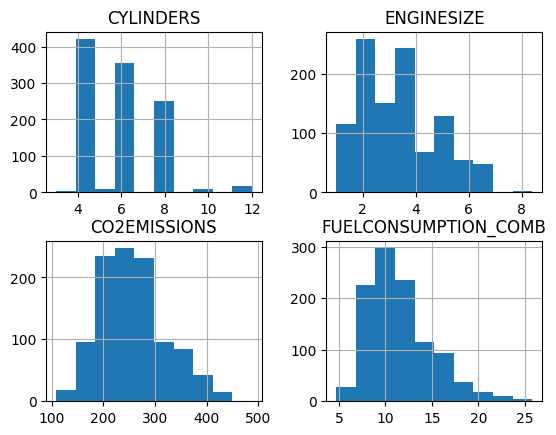

In [11]:
viz = kdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

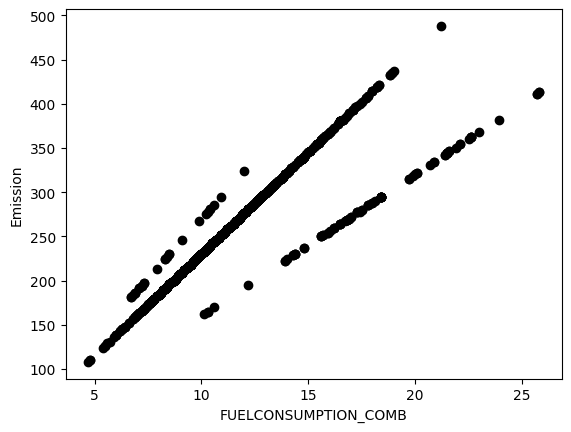

In [17]:
plt.scatter(kdf.FUELCONSUMPTION_COMB, kdf.CO2EMISSIONS,  color='black')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

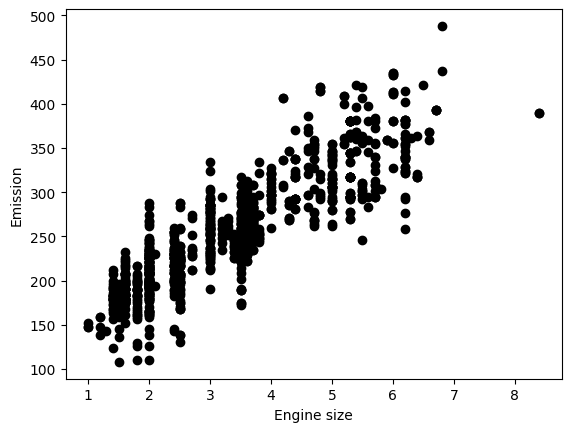

In [18]:
plt.scatter(kdf.ENGINESIZE, kdf.CO2EMISSIONS,  color='black')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

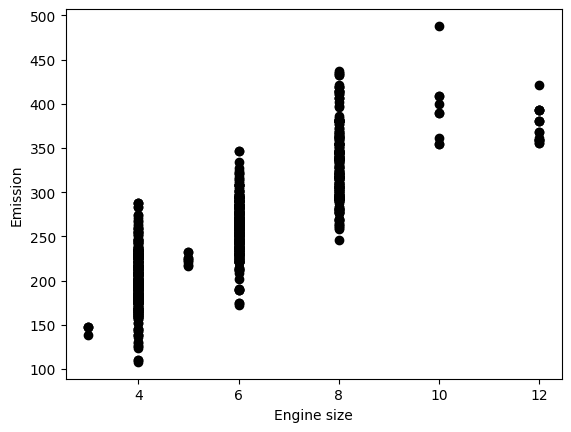

In [19]:
plt.scatter(kdf.CYLINDERS, kdf.CO2EMISSIONS,  color='black')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Creating train and test dataset


Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [20]:
msk = np.random.rand(len(df)) < 0.8
train = kdf[msk]
test = kdf[~msk]

msk = np.random.rand(len(df)) < 0.8:

This line generates a random array of boolean values using NumPy (np.random.rand(len(df))) where each element is a random number between 0 and 1. It then compares each random number to the value 0.8, resulting in an array of boolean values. The purpose of this line is to create a mask (msk) where elements are True if the random number is less than 0.8, indicating that the corresponding row from the DataFrame df should be included in the training set, and False if it's greater than or equal to 0.8, indicating that the corresponding row should be in the test set.

**Regression Model**

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

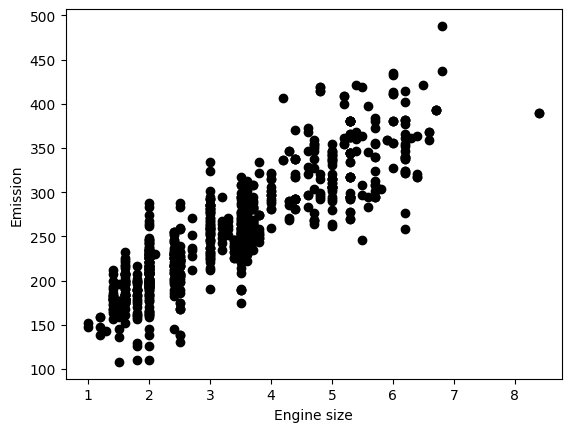

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='black')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Modeling - Sk learn**

In [23]:
from sklearn import linear_model

In [24]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.02072137]]
Intercept:  [126.14236846]


Plot Out puts

Text(0, 0.5, 'Emission')

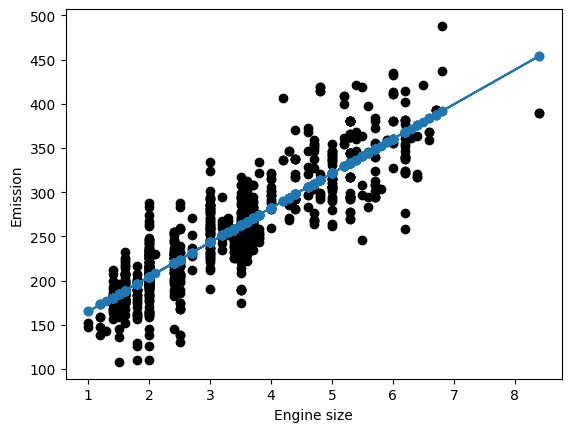

In [27]:
#plotting the fit line over the data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='black')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-o')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evaluation

In [28]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.60
Residual sum of squares (MSE): 944.74
R2-score: 0.76
